	
주문내역에 대한 학습용 데이터를 활용하여 주문건별 정시도착 여부(Reached.on.Time_Y.N)를 예측하는 모델을 개발한 후

이를 평가용 데이터에 적용하여 얻은 정시도착 여부 예측 확률을 csv 파일로 만들어 제출하시오

이때, csv 파일의 컬럼은 [테스트데이터의 ID, 정시도착 여부 예측확률] 로 구성하시오

#### 종속변수 : Reached.on.Time_Y.N



In [567]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [501]:
df = pd.read_csv("./data/E_commerce.csv")
df.head(20)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [502]:
df.shape

(10999, 12)

In [503]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


- 결측치는 없음 

In [505]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

C:\Users\ITSC\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


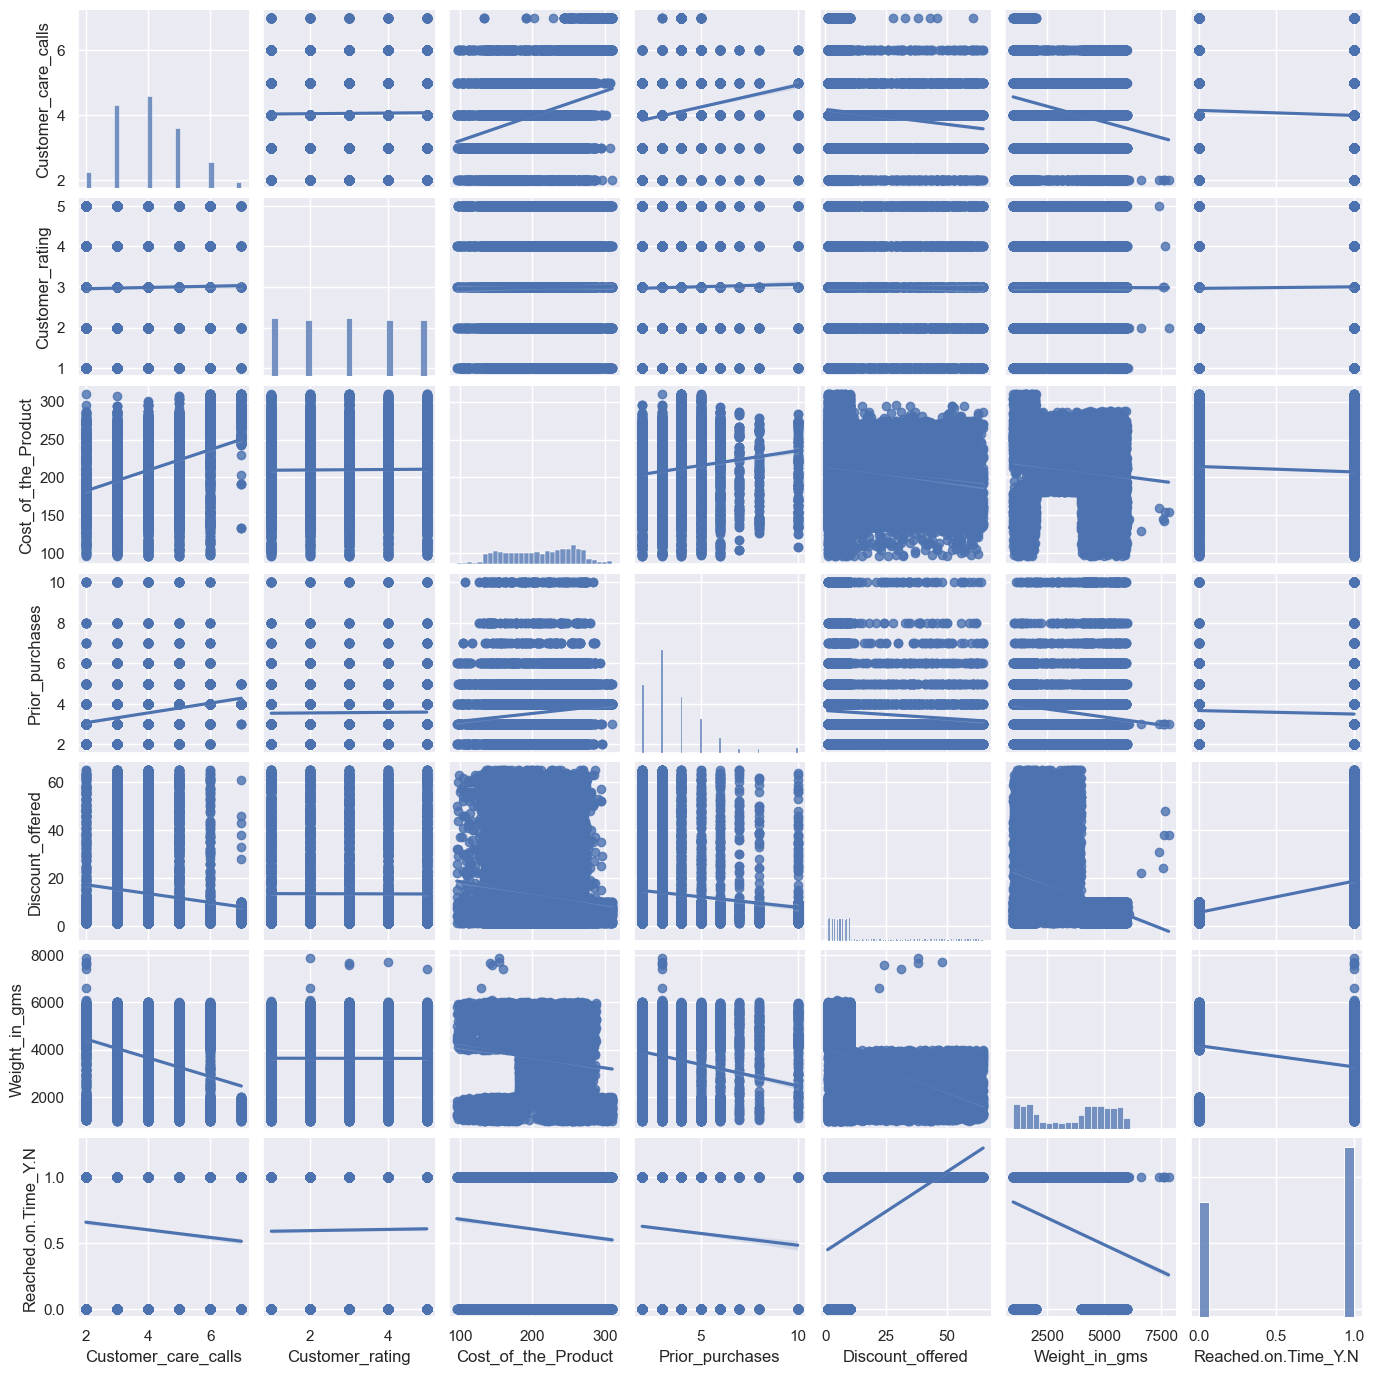

In [237]:
sns.pairplot(df.drop("Warehouse_block", axis = 1), kind='reg', height = 2)

In [506]:
df_corr = df.corr(numeric_only = True)
df_corr

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


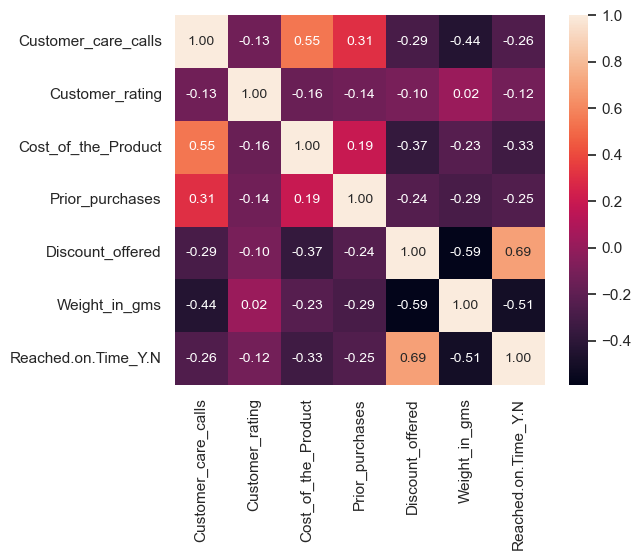

In [29]:
corr_mat = np.corrcoef(df_corr.values.T)
sns.set()
full_mat = sns.heatmap(corr_mat, cbar = True, annot = True, square = True, fmt = ".2f",
                      annot_kws = {"size" : 10}, yticklabels = df_corr,
                      xticklabels = df_corr)
plt.show()

## 데이터 전처리

## "Mode_of_Shipment" 원핫인코딩

In [507]:
df["Mode_of_Shipment"].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [508]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [509]:
ohe = OneHotEncoder()

In [510]:
onehot_ms = np.array(df["Mode_of_Shipment"])

In [511]:
onehot_ms = np.reshape(onehot_ms, (-1, 1))

In [512]:
shipment = ohe.fit_transform(onehot_ms)

In [513]:
ohe.get_feature_names_out()

array(['x0_Flight', 'x0_Road', 'x0_Ship'], dtype=object)

In [514]:
shipment

<10999x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10999 stored elements in Compressed Sparse Row format>

In [515]:
ohe_ms_df = pd.DataFrame(shipment.toarray(), columns = ohe.get_feature_names_out())

In [516]:
ohe_ms_df.head()

,x0_Flight,x0_Road,x0_Ship
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [517]:
ohe_ms_df.shape

(10999, 3)

In [518]:
df = pd.concat([df, ohe_ms_df], axis = 1)

### # 원핫인코딩이 안된 애들을 스케일링 하기

In [519]:
df = df.drop(['Warehouse_block', 'Customer_care_calls', 'Customer_rating',
       'Cost_of_the_Product', 'Prior_purchases', 'Product_importance',
       'Gender'], axis = 1)

In [520]:
df.columns

Index(['ID', 'Mode_of_Shipment', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'x0_Flight', 'x0_Road', 'x0_Ship'],
      dtype='object')

In [521]:
x = df.drop(["Reached.on.Time_Y.N"], axis = 1)

# 종속변수 
y = df["Reached.on.Time_Y.N"]

In [522]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 10)

In [523]:
x_train.shape, x_test.shape

((8799, 7), (2200, 7))

In [524]:
x_train.columns

Index(['ID', 'Mode_of_Shipment', 'Discount_offered', 'Weight_in_gms',
       'x0_Flight', 'x0_Road', 'x0_Ship'],
      dtype='object')

In [525]:
x_train.iloc[:, :3]

,ID,Mode_of_Shipment,Discount_offered
1096,1097,Flight,12
10209,10210,Ship,4
10001,10002,Flight,10
3564,3565,Flight,9
7002,7003,Flight,5
...,...,...,...
9372,9373,Ship,9
7291,7292,Ship,10
1344,1345,Road,2
7293,7294,Ship,6


In [526]:
scale_col = x_train.columns[:3].tolist()

In [527]:
scale_col

['ID', 'Mode_of_Shipment', 'Discount_offered']

In [528]:
df_ss = StandardScaler()
scaled_train = df_ss.fit_transform(x_train[scale_col])
scaled_test = df_ss.transform(x_test[scale_col])

ValueError: could not convert string to float: 'Flight'

In [ ]:
scaled_test

In [ ]:
len(scaled_train), len(scaled_test)

In [ ]:
scaled_train = pd.DataFrame(scaled_train, columns = scale_col)
scaled_test = pd.DataFrame(scaled_test, columns = scale_col)

In [529]:
scaled_train.head()

,ID,Discount_offered,Weight_in_gms,x0_Flight,x0_Road,x0_Ship
0,-1.397631,-0.076930,-0.455379,1.0,0.0,0.0
1,1.477311,-0.575661,-1.506913,0.0,0.0,1.0
2,1.411691,-0.201612,1.200435,1.0,0.0,0.0
3,-0.619034,-0.263954,1.238928,1.0,0.0,0.0
4,0.465576,-0.513320,1.156443,1.0,0.0,0.0


In [530]:
# 인덱스가 다름
x_train.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,x0_Flight,x0_Road,x0_Ship
1096,1097,Flight,12,2892,1.0,0.0,0.0
10209,10210,Ship,4,1171,0.0,0.0,1.0
10001,10002,Flight,10,5602,1.0,0.0,0.0
3564,3565,Flight,9,5665,1.0,0.0,0.0
7002,7003,Flight,5,5530,1.0,0.0,0.0


In [531]:
# x_train의 인덱스를 초기화 해줌 
scaled_train = pd.concat([scaled_train, x_train.iloc[:, 3:].reset_index(drop = True)],
                         axis = 1)
scaled_test = pd.concat([scaled_test, x_test.iloc[:, 3:].reset_index(drop = True)],
                         axis = 1)

In [532]:
x_train

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,x0_Flight,x0_Road,x0_Ship
1096,1097,Flight,12,2892,1.0,0.0,0.0
10209,10210,Ship,4,1171,0.0,0.0,1.0
10001,10002,Flight,10,5602,1.0,0.0,0.0
3564,3565,Flight,9,5665,1.0,0.0,0.0
7002,7003,Flight,5,5530,1.0,0.0,0.0
...,...,...,...,...,...,...,...
9372,9373,Ship,9,5057,0.0,0.0,1.0
7291,7292,Ship,10,5024,0.0,0.0,1.0
1344,1345,Road,2,1307,0.0,1.0,0.0
7293,7294,Ship,6,5482,0.0,0.0,1.0


In [533]:
scaled_train.shape, scaled_test.shape

((8799, 10), (2200, 10))

In [534]:
len(y_train), len(y_test)

(8799, 2200)

In [535]:
scaled_train.head()

,ID,Discount_offered,Weight_in_gms,x0_Flight,x0_Road,x0_Ship,Weight_in_gms,x0_Flight,x0_Road,x0_Ship
0,-1.397631,-0.076930,-0.455379,1.0,0.0,0.0,2892,1.0,0.0,0.0
1,1.477311,-0.575661,-1.506913,0.0,0.0,1.0,1171,0.0,0.0,1.0
2,1.411691,-0.201612,1.200435,1.0,0.0,0.0,5602,1.0,0.0,0.0
3,-0.619034,-0.263954,1.238928,1.0,0.0,0.0,5665,1.0,0.0,0.0
4,0.465576,-0.513320,1.156443,1.0,0.0,0.0,5530,1.0,0.0,0.0


In [536]:
lr = LinearRegression()

In [537]:
lr.fit(scaled_train, y_train)

LinearRegression()

In [538]:
lr.coef_

array([-1.28835978e-01,  9.36384956e-02, -2.20623964e-08,  5.48356269e-03,
       -5.69054640e-03,  2.06983710e-04, -3.61085735e-05,  5.48356269e-03,
       -5.69054640e-03,  2.06983710e-04])

In [539]:
lr.intercept_

0.7286077605719147

In [540]:
lr.score(scaled_test, y_test)

0.2321372831755938

In [541]:
pred = lr.predict(scaled_test)

In [542]:

x = sm.add_constant(scaled_train)

In [543]:
model = sm.OLS(y_train.reset_index(drop = True), x)

In [544]:
model = model.fit()

In [545]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Reached.on.Time_Y.N   R-squared:                       0.214
Model:                             OLS   Adj. R-squared:                  0.214
Method:                  Least Squares   F-statistic:                     479.5
Date:                 Thu, 28 Mar 2024   Prob (F-statistic):               0.00
Time:                         15:52:32   Log-Likelihood:                -5154.7
No. Observations:                 8799   AIC:                         1.032e+04
Df Residuals:                     8793   BIC:                         1.036e+04
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1103      0.002     58.136      0.000       0.107       0.114
ID                  -0.1288      0.006    -22.281      0.000      -0.140      -0.118
Discount_offered     0.0936      0.006     15.628      0.000       0.082       0.105
Weight_in_gms       -0.2451      0.004    -58.136      0.000      -0.253      -0.237
x0_Flight            0.0423      0.004      9.401      0.000       0.033       0.051
x0_Road              0.0311      0.005      6.805      0.000       0.022       0.040
x0_Ship              0.0370      0.003     11.563      0.000       0.031       0.043
Weight_in_gms        0.0001   1.42e-06     80.276      0.000       0.000       0.000
x0_Flight            0.0423      0.004      9.401      0.000       0.033       0.051
x0_Road              0.0311      0.005      6.805      0.000       0.022       0.040
x0_Ship              0.0370      0.003     11.563      0.000       0.031       0.043
==============================================================================
Omnibus:                    58208.170   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              801.703
Skew:                           0.058   Prob(JB):                    8.17e-175
Kurtosis:                       1.526   Cond. No.                     2.16e+35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-60. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [546]:
ndf = df.copy()
ndf.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
0,1,Flight,44,1233,1,1.0,0.0,0.0
1,2,Flight,59,3088,1,1.0,0.0,0.0
2,3,Flight,48,3374,1,1.0,0.0,0.0
3,4,Flight,10,1177,1,1.0,0.0,0.0
4,5,Flight,46,2484,1,1.0,0.0,0.0


In [547]:
ndf.corr(numeric_only = True)

,ID,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
ID,1.000000,-0.598278,0.278312,-0.411822,0.000269,0.004536,-0.003772
Discount_offered,-0.598278,1.000000,-0.376067,0.397108,-0.005750,-0.007787,0.010643
Weight_in_gms,0.278312,-0.376067,1.000000,-0.268793,-0.001245,0.004146,-0.002273
Reached.on.Time_Y.N,-0.411822,0.397108,-0.268793,1.000000,0.004371,-0.007671,0.002577
x0_Flight,0.000269,-0.005750,-0.001245,0.004371,1.000000,-0.191591,-0.637590
x0_Road,0.004536,-0.007787,0.004146,-0.007671,-0.191591,1.000000,-0.633948
x0_Ship,-0.003772,0.010643,-0.002273,0.002577,-0.637590,-0.633948,1.000000


In [548]:
ndf.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
0,1,Flight,44,1233,1,1.0,0.0,0.0
1,2,Flight,59,3088,1,1.0,0.0,0.0
2,3,Flight,48,3374,1,1.0,0.0,0.0
3,4,Flight,10,1177,1,1.0,0.0,0.0
4,5,Flight,46,2484,1,1.0,0.0,0.0


In [549]:
ndf.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
0,1,Flight,44,1233,1,1.0,0.0,0.0
1,2,Flight,59,3088,1,1.0,0.0,0.0
2,3,Flight,48,3374,1,1.0,0.0,0.0
3,4,Flight,10,1177,1,1.0,0.0,0.0
4,5,Flight,46,2484,1,1.0,0.0,0.0


In [550]:
ndf.columns

Index(['ID', 'Mode_of_Shipment', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N', 'x0_Flight', 'x0_Road', 'x0_Ship'],
      dtype='object')

## 정시도착 여부 예측확률
- time_y_df : yes (0)
- time_n_df : no (1)

In [551]:
ndf[ndf['Reached.on.Time_Y.N'] == 1]

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
0,1,Flight,44,1233,1,1.0,0.0,0.0
1,2,Flight,59,3088,1,1.0,0.0,0.0
2,3,Flight,48,3374,1,1.0,0.0,0.0
3,4,Flight,10,1177,1,1.0,0.0,0.0
4,5,Flight,46,2484,1,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10985,10986,Ship,10,1040,1,0.0,0.0,1.0
10986,10987,Ship,5,1458,1,0.0,0.0,1.0
10987,10988,Ship,10,1846,1,0.0,0.0,1.0
10991,10992,Ship,9,1227,1,0.0,0.0,1.0


In [552]:
time_y_df = ndf[ndf['Reached.on.Time_Y.N'] == 0]
time_n_df = ndf[ndf['Reached.on.Time_Y.N'] == 1]

### 정시도착

In [553]:
time_y_df.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
3135,3136,Road,8,5031,0,0.0,1.0,0.0
3136,3137,Road,4,5956,0,0.0,1.0,0.0
3137,3138,Road,7,4245,0,0.0,1.0,0.0
3138,3139,Road,5,4622,0,0.0,1.0,0.0
3140,3141,Road,3,4732,0,0.0,1.0,0.0


#### 정시 미도착

In [554]:
time_n_df.head()

,ID,Mode_of_Shipment,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,x0_Flight,x0_Road,x0_Ship
0,1,Flight,44,1233,1,1.0,0.0,0.0
1,2,Flight,59,3088,1,1.0,0.0,0.0
2,3,Flight,48,3374,1,1.0,0.0,0.0
3,4,Flight,10,1177,1,1.0,0.0,0.0
4,5,Flight,46,2484,1,1.0,0.0,0.0


In [555]:
time_n_df.shape

(6563, 8)

### 정시도착 데이터 

In [556]:
time_y_df.shape

(4436, 8)

In [557]:
time_y_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4436 entries, 3135 to 10998
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   4436 non-null   int64  
 1   Mode_of_Shipment     4436 non-null   object 
 2   Discount_offered     4436 non-null   int64  
 3   Weight_in_gms        4436 non-null   int64  
 4   Reached.on.Time_Y.N  4436 non-null   int64  
 5   x0_Flight            4436 non-null   float64
 6   x0_Road              4436 non-null   float64
 7   x0_Ship              4436 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 311.9+ KB


In [558]:
time_y_df.dtypes

ID                       int64
Mode_of_Shipment        object
Discount_offered         int64
Weight_in_gms            int64
Reached.on.Time_Y.N      int64
x0_Flight              float64
x0_Road                float64
x0_Ship                float64
dtype: object

In [559]:
x = time_y_df.drop("Reached.on.Time_Y.N", axis = 1)
y = time_y_df["Reached.on.Time_Y.N"]
print(x.shape, y.shape)

(4436, 7) (4436,)


In [560]:
# x = ndf[['ID', 'Discount_offered', 'Weight_in_gms', 
#        'x0_Flight', 'x0_Road', 'x0_Ship']]
# y = ndf["Reached.on.Time_Y.N"]
# print(x.shape, y.shape)

In [561]:
# ss = StandardScaler()

In [562]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [563]:
len(x_train), len(x_test)

(3105, 1331)